# Exploration 2 #
* In this I'm going to start with mixing the pop_0_4 and pop_5_9 and pop_10_14.
* Then, I'm going to get the adult and child population.
* After that I'm going to find the amount of adults with literary skills.
* Along with the number of people who have access to the internet.

* I will then graph these numbers to see if anything follows a trend.

* Then I will find the approximate gpd with the income of each person times the population.
* After that I will find the approximate amount of money spent on research and development.


In [1]:
ls ../csv

co2_pp.csv
energy.csv
energy_production_total.csv
gdp.csv
hdi.csv
hdi_human_development_index.csv
hte.csv
income_per_person_gdppercapita_ppp_inflation_adjusted.csv
internet_users.csv
ley.csv
literacy_15_above.csv
pop_0_4.csv
pop_10_14.csv
pop_5_9.csv
pop_tot.csv
rd_gpd_per.csv


For collecting this data I went to [Gapminder](https://www.gapminder.org/data/).

The indicators selected:
  * Population->Population
  * Income
  * Population->Both sexes by age (/%):
      * 0-4
      * 5-9
      * 9-14
  * Education->Literacy
  * Infrastructure->Communication->Internet Users
  * More Data->wdi->Infrastructure->Technology->Research And Development (% of gdp)

## Questions after view Gapminder ##
1. **What affects GPD the most?**
2. **What affects the growth in internet users?**
3. **Does research and development affect internet users or GPD?**

In [2]:
# population
pop_file = 'pop_tot.csv'
# percent of population
pop_0_4_file = 'pop_0_4.csv'
pop_5_9_file = 'pop_5_9.csv'
pop_10_14_file = 'pop_10_14.csv'
lit_file = 'literacy_15_above.csv'
net_file = 'internet_users.csv'
#gpd
gdp_file = 'gdp.csv'
# percent of gpd
rd_file = 'rd_gpd_per.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Setup the population under 15 to be ready added together

In [4]:
pop4_df = pd.read_csv('../csv/'+pop_0_4_file)
pop9_df = pd.read_csv('../csv/'+pop_5_9_file)
pop14_df= pd.read_csv('../csv/'+pop_10_14_file)

In [5]:
pop4_df.set_index('country', inplace=True)

In [6]:
pop9_df.set_index('country', inplace=True)
pop14_df.set_index('country', inplace=True)

In [7]:
pop4_df = pop4_df.transpose().rolling(15,1,win_type='gaussian',center=True).mean(std=pop4_df.describe().transpose()['std'].mean())

In [8]:
pop9_df = pop9_df.transpose().rolling(15,1,win_type='gaussian',center=True).mean(std=pop9_df.describe().transpose()['std'].mean())
pop14_df = pop14_df.transpose().rolling(15,1,win_type='gaussian',center=True).mean(std=pop14_df.describe().transpose()['std'].mean())

Add the population under 15 together to subtract from the total population to find the adult population

In [9]:
child_pop_df = pop4_df + pop9_df + pop14_df
child_pop_df.head()
child_pop_df.index = pd.to_datetime(child_pop_df.index)

Prepare the population to be subtracted by the child population

In [10]:
pop_df = pd.read_csv('../csv/'+pop_file)

In [11]:
pop_df = pop_df.set_index('country').transpose().rolling(5,1).mean()
pop_df.index= pd.to_datetime(pop_df.index)

In [12]:
# divide by 100 to get the decimal percentage
child_pop_df = (child_pop_df /100) * pop_df

In [13]:
adult_pop_df = pop_df - child_pop_df
adult_pop_df.index = pd.to_datetime(adult_pop_df.index)

Drop all the null columns and rows (countries and years) that couldnt be calculated from missing population data

In [14]:
adult_pop_df.dropna(how='all', axis=1, inplace=True)
adult_pop_df.dropna(how='all', inplace=True)
child_pop_df.dropna(how='all', axis=1, inplace=True)
child_pop_df.dropna(how='all', inplace=True)
pop_df = child_pop_df+adult_pop_df

Prepare the literate adult percentage. 
* missing a lot of data and trying new method, backfill

In [15]:
lit_adult_df = pd.read_csv('../csv/'+lit_file)

In [16]:
lit_adult_df = lit_adult_df.set_index('country').transpose().rolling(37,1,center=True).mean()

In [17]:
lit_adult_df.fillna(method='backfill', inplace=True)


Prepare percentage of internet users.

In [18]:
net_user_df = pd.read_csv('../csv/'+net_file)

In [19]:
net_user_df = net_user_df.set_index('country').transpose().rolling(15,1,center=True).mean()
net_user_df.index = pd.to_datetime(net_user_df.index)

Prepare the capita per person

In [20]:
gdp_df = pd.read_csv('../csv/'+gdp_file)

In [21]:
gdp_df.set_index('year',inplace=True)

In [22]:
gdp_df.index = pd.to_datetime(gdp_df.index)

In [23]:
gdp_df =gdp_df.rolling(5,1,win_type='gaussian', center=True).mean(std=5)

Calculate approximate total gdp by multiplying the capita per person by the adult population

In [24]:
gdp_df = gdp_df * adult_pop_df

In [25]:
gdp_df.dropna(how='all',inplace=True)
gdp_df.dropna(how='all',axis=1, inplace=True)

find the average value of gdp and population for graphing purposes

In [26]:
gdp_df.mean().mean(), pop_df.mean().mean()

(320726716793.11993, 40655425.8227757)

Find the percent of gdp each country uses for research and development.

In [27]:
rd_df = pd.read_csv('../csv/'+rd_file)

In [28]:
rd_df = rd_df.set_index('country').transpose()

In [29]:
rd_std = rd_df.describe().transpose()['std'].mean()

In [30]:
rd_df = rd_df.rolling(5,1,win_type='gaussian').mean(std=rd_std)

In [31]:
rd_df = rd_df/100

Loop through all the dataframes and drop any index above 2021 and add average of all countries into last column

In [32]:
for frame in [pop_df, gdp_df, rd_df, net_user_df, child_pop_df, adult_pop_df, lit_adult_df]:
    frame.drop(frame['2021-01-01':].index, inplace=True)
    frame['All Countries Average'] = frame.mean(axis=1)

# Drawing conclusions through visuals #
1. loop through all the columns in population table
2. check if the column exist in:
* gdp
    * yes: check if column exist in research and development
* internet users
* child population(maybe should graph these since population data is made from each other)
* adult population("")
    * if yes: check if column exist in adult literacy percentage
    
I'm looking for any lines that move together or that after a certain threshold cause a change.

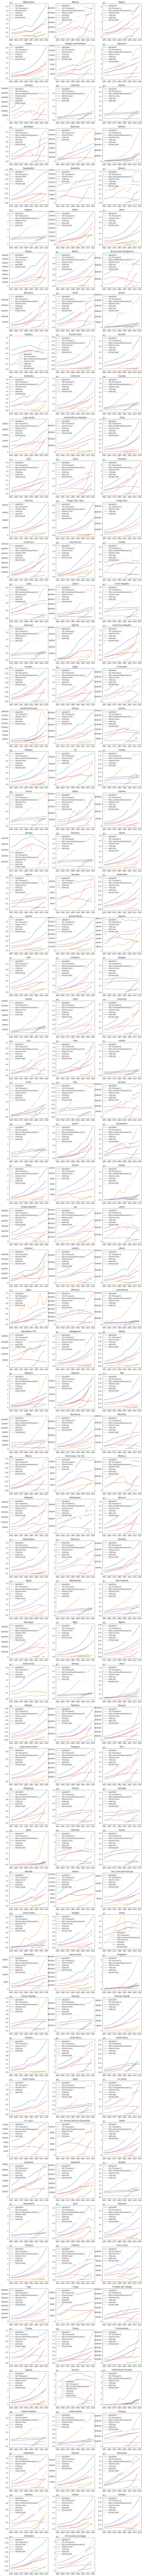

In [33]:

plt.figure(num=1, figsize=(15,300))
for i,column in enumerate(pop_df.columns):
    ax = plt.subplot(len(pop_df.columns)/3+1,3,i+1, label=column)
    ax.plot(pop_df[column], label='population',)
    if column in gdp_df.columns:
        ax.plot(gdp_df[column]/10000, label='Ten Thousand $')
        if column in rd_df.columns:
            ax.plot(gdp_df[column]/1000*rd_df[column], label='R&D investment(thousand $)')
    if column in net_user_df.columns:
        ax.plot(net_user_df[column]/100*pop_df[column],label='internet users')
    if column in child_pop_df.columns:
        ax.plot(child_pop_df[column],label='child pop')
    if column in adult_pop_df.columns:
        ax.plot(adult_pop_df[column],label='adult pop')
        if column in lit_adult_df.columns:
            ax.plot(adult_pop_df[column]*lit_adult_df[column]/100, label='literate adult')
    ax.legend()
    ax.title.set_text(column)
plt.show()


couldnt convert notebook to pdf with plots

# Conclusion #
**Question:** *What affects the total internet users?*

*Deduction:* *From what can be seen, the countries with a higher gdp tend to have a faster growth in internet users.*

**Question:** *What causes the most change in gdp?*

*Deduction:* *Though these graphs only so show much, population and the year 2000 can be seen to have the most dramatic affect on gdp.*

**Question:** *Do countries with reported Research & Development have anymore growth than those without?*

*Deduction:* *Countries with Research and Development funding show almost no difference in growth except in a few cases. Which could still be causes by other factors than the ones shown here.*

# Credits #
For the most part the pandas and matplotlib documentation helped a lot.

For how to organize the subplots it was found [here](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)

For how to add titles to the subplots it was found [here](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib)